scikit-learn version: 1.6.1
Loading: /content/ESC 12 Pavement Dataset.csv
Initial shape: (1050000, 10)


,Segment ID,PCI,Road Type,AADT,Asphalt Type,Last Maintenance,Average Rainfall,Rutting,IRI,Needs Maintenance
0,SID 155440,70.00,Secondary,4634,Concrete,2022,42.07,15.11,0.68,0
1,SID 244365,37.87,Tertiary,3474,Asphalt,2017,79.60,19.67,0.99,1
2,SID 137867,88.32,Tertiary,1734,Concrete,2019,62.69,14.73,0.50,0
3,SID 540519,52.30,Tertiary,3119,Asphalt,2008,79.32,17.01,1.04,1
4,SID 745776,49.10,Tertiary,3505,Asphalt,2019,71.81,21.08,1.18,1



Dtypes after conversion:
Segment_ID            object
PCI                  float64
Road_Type             object
AADT                   int64
Asphalt_Type          object
Last_Maintenance       int64
Average_Rainfall     float64
Rutting              float64
IRI                  float64
Needs_Maintenance      int64
dtype: object

Sampling to 200000 rows for EDA/modeling (change SAMPLE_N at top if needed).
Working shape: (200000, 10)

=== Observation 1: PCI distribution & skewness ===
Count: 200000


,PCI
count,200000.000000
mean,54.678182
std,28.759395
min,0.000000
25%,30.020000
50%,54.920000
75%,80.040000
max,100.000000


Skewness: -0.061973308697610696


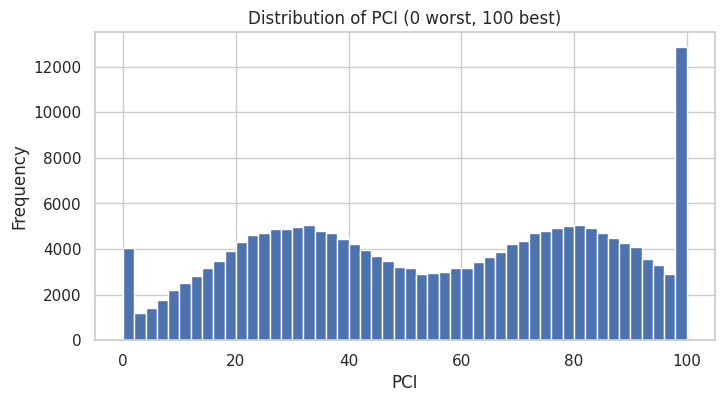


=== Observation 2: Rutting vs Average_Rainfall (scatter + correlations) ===
Rows used: 200000
Pearson: 0.8038, Spearman: 0.7787


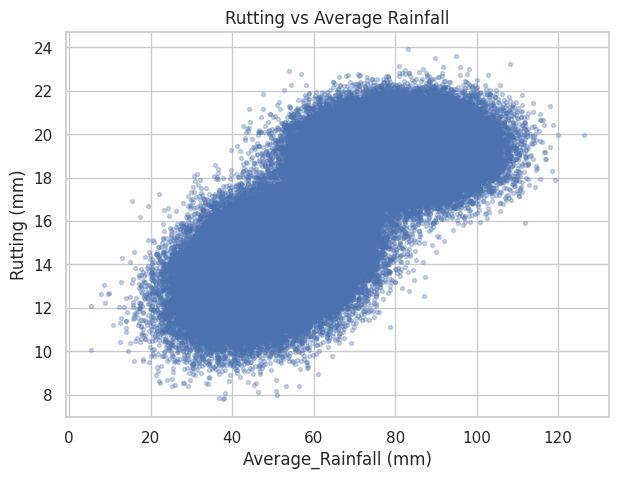


=== Observation 3: Mean AADT by Road_Type ===


,count,mean,median
Road_Type,,,
Primary,43162,30926.874056,28175.0
Secondary,63398,11807.083851,10724.0
Tertiary,93440,2464.496982,2280.0


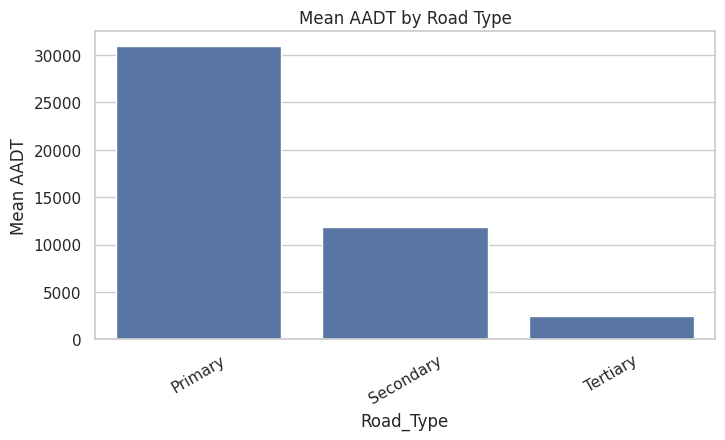


=== Observation 4: Derived 'decay' feature ===


,decay
count,199954.000000
mean,2.994951
std,2.233688
min,0.328852
25%,1.787778
50%,2.487500
75%,3.215000
max,19.280000


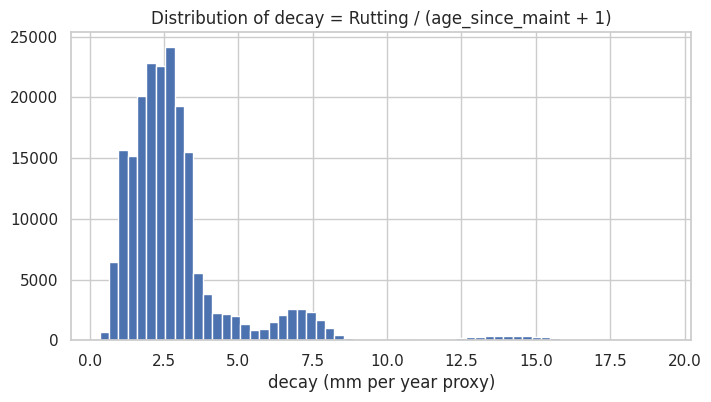


=== Observation 5: Proportion Needs_Maintenance by Road_Type ===


,proportion_needs_maint,count
Road_Type,,
Tertiary,0.585649,93440
Secondary,0.485173,63398
Primary,0.339998,43162


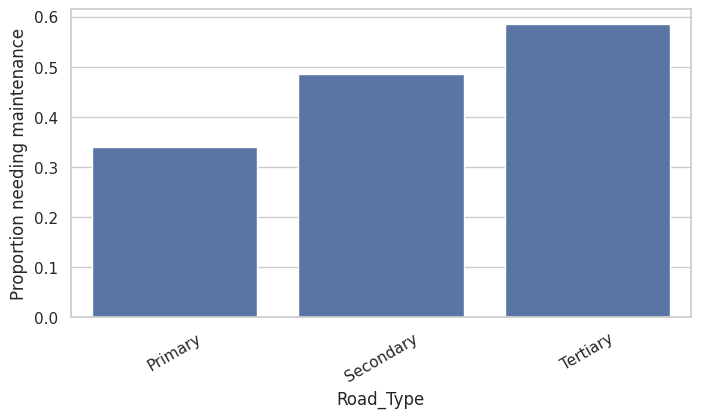


=== Bonus: Numeric correlation matrix (Pearson) ===


,PCI,AADT,Last_Maintenance,Average_Rainfall,Rutting,IRI,Needs_Maintenance,age_since_maint,decay
PCI,1.000000,-0.003549,0.453118,-0.706792,-0.765966,-0.427782,-0.851142,-0.452993,0.293428
AADT,-0.003549,1.000000,-0.004183,0.004431,0.094343,0.085812,0.004355,0.004158,0.024179
Last_Maintenance,0.453118,-0.004183,1.000000,-0.441543,-0.479514,-0.269603,-0.532566,-1.000000,0.622697
Average_Rainfall,-0.706792,0.004431,-0.441543,1.000000,0.803811,0.427787,0.830885,0.441439,-0.264913
Rutting,-0.765966,0.094343,-0.479514,0.803811,1.000000,0.490240,0.899834,0.479404,-0.254752
IRI,-0.427782,0.085812,-0.269603,0.427787,0.490240,1.000000,0.502527,0.269529,-0.160946
Needs_Maintenance,-0.851142,0.004355,-0.532566,0.830885,0.899834,0.502527,1.000000,0.532416,-0.342764
age_since_maint,-0.452993,0.004158,-1.000000,0.441439,0.479404,0.269529,0.532416,1.000000,-0.622697
decay,0.293428,0.024179,0.622697,-0.264913,-0.254752,-0.160946,-0.342764,-0.622697,1.000000


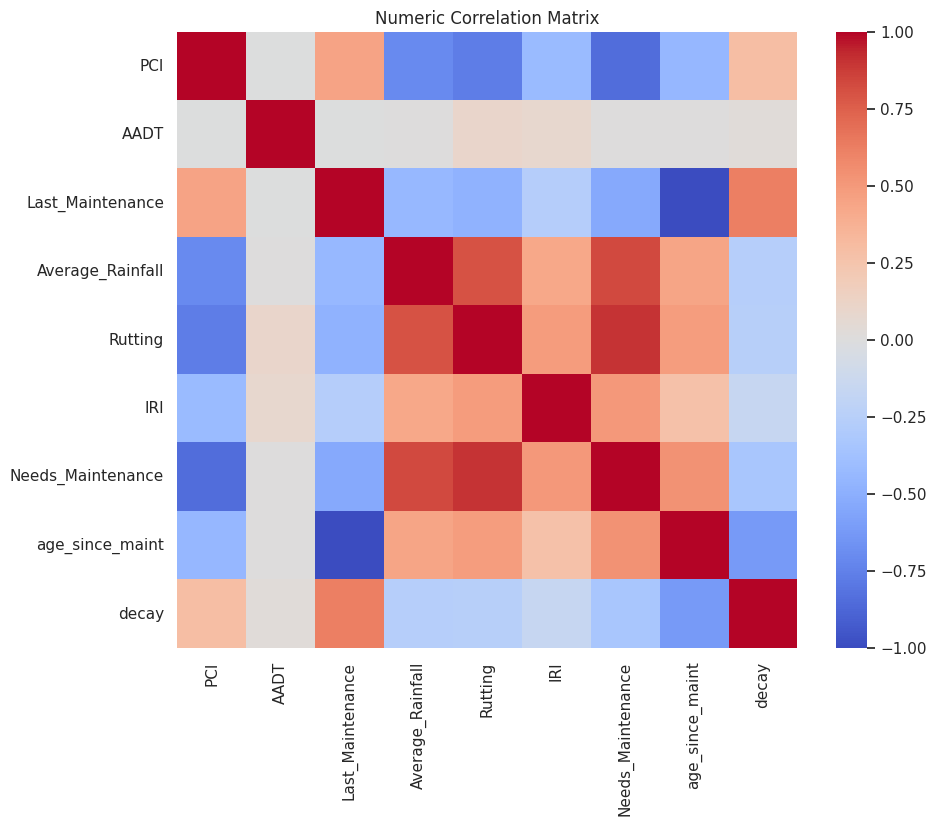


=== Baseline: Logistic Regression ===
Numeric features: ['PCI', 'AADT', 'Rutting', 'IRI', 'Average_Rainfall', 'decay']
Categorical features: ['Road_Type', 'Asphalt_Type']
Rows with target: 200000
Using OneHotEncoder(sparse_output=True)
Fitting model...
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
ROC AUC: 1.0000
Confusion matrix (true rows, pred cols):
[[24957     4]
 [    1 25038]]


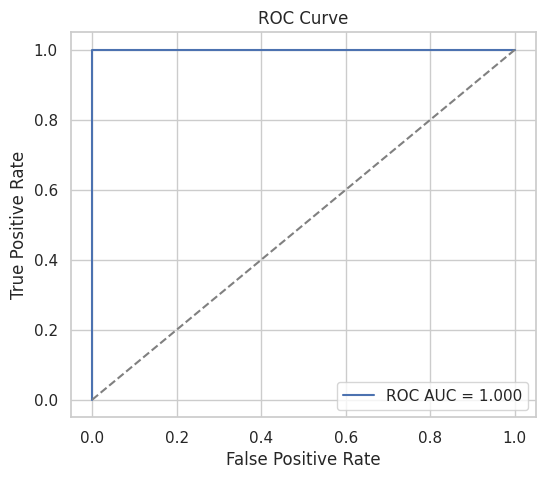


Script finished. Tip: If memory still becomes an issue, reduce SAMPLE_N (top) to e.g. 50_000 or 20_000.


In [6]:

import os, random, warnings
warnings.filterwarnings("ignore")
RANDOM_STATE = 42
random.seed(RANDOM_STATE)
import numpy as np
np.random.seed(RANDOM_STATE)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from IPython.display import display, HTML


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

print("scikit-learn version:", sklearn.__version__)


DATA_PATH = "/content/ESC 12 Pavement Dataset.csv"
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"CSV not found at {DATA_PATH}. Upload the file to /content or change DATA_PATH.")

print("Loading:", DATA_PATH)

df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip()
print("Initial shape:", df.shape)
display(df.head())


cols_map = {
    'Needs Maintenance': 'Needs_Maintenance',
    'Last Maintenance': 'Last_Maintenance',
    'Average Rainfall': 'Average_Rainfall',
    'Road Type': 'Road_Type',
    'Asphalt Type': 'Asphalt_Type',
    'Segment ID': 'Segment_ID'
}
df.rename(columns=cols_map, inplace=True)

for c in ['PCI','AADT','Average_Rainfall','Rutting','IRI','Last_Maintenance','Needs_Maintenance']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

print("\nDtypes after conversion:")
print(df.dtypes)

SAMPLE_N = 200_000
if SAMPLE_N is not None and df.shape[0] > SAMPLE_N:
    df = df.sample(n=SAMPLE_N, random_state=RANDOM_STATE).reset_index(drop=True)
    print(f"\nSampling to {SAMPLE_N} rows for EDA/modeling (change SAMPLE_N at top if needed).")
else:
    print("\nUsing full dataset (no sampling).")
print("Working shape:", df.shape)


print("\n=== Observation 1: PCI distribution & skewness ===")
if 'PCI' in df.columns:
    pci = df['PCI'].dropna().astype(float)
    print("Count:", len(pci))
    display(pci.describe())
    print("Skewness:", pci.skew())
    plt.figure(figsize=(8,4))
    plt.hist(pci, bins=50)
    plt.title("Distribution of PCI (0 worst, 100 best)")
    plt.xlabel("PCI")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("PCI not found.")


print("\n=== Observation 2: Rutting vs Average_Rainfall (scatter + correlations) ===")
if set(['Rutting','Average_Rainfall']).issubset(df.columns):
    tmp = df[['Rutting','Average_Rainfall']].dropna().astype(float)
    print("Rows used:", tmp.shape[0])
    pearson = tmp['Rutting'].corr(tmp['Average_Rainfall'], method='pearson')
    spearman = tmp['Rutting'].corr(tmp['Average_Rainfall'], method='spearman')
    print(f"Pearson: {pearson:.4f}, Spearman: {spearman:.4f}")
    plt.figure(figsize=(7,5))
    plt.scatter(tmp['Average_Rainfall'], tmp['Rutting'], alpha=0.3, s=8)
    plt.xlabel("Average_Rainfall (mm)")
    plt.ylabel("Rutting (mm)")
    plt.title("Rutting vs Average Rainfall")
    plt.show()
else:
    print("Rutting or Average_Rainfall missing.")

print("\n=== Observation 3: Mean AADT by Road_Type ===")
if 'Road_Type' in df.columns and 'AADT' in df.columns:
    df['AADT'] = pd.to_numeric(df['AADT'], errors='coerce')
    grp = df.groupby('Road_Type')['AADT'].agg(['count','mean','median']).sort_values('mean', ascending=False)
    display(grp)
    plt.figure(figsize=(8,4))
    sns.barplot(x=grp.index, y=grp['mean'])
    plt.title("Mean AADT by Road Type")
    plt.ylabel("Mean AADT")
    plt.xticks(rotation=30)
    plt.show()
else:
    print("Road_Type and/or AADT missing.")

print("\n=== Observation 4: Derived 'decay' feature ===")
CURRENT_YEAR = 2025
if 'Last_Maintenance' in df.columns and 'Rutting' in df.columns:
    df['Last_Maintenance'] = pd.to_numeric(df['Last_Maintenance'], errors='coerce')
    df['age_since_maint'] = CURRENT_YEAR - df['Last_Maintenance']
    df.loc[df['age_since_maint'] < 0, 'age_since_maint'] = np.nan
    df['decay'] = df['Rutting'] / (df['age_since_maint'] + 1)
    display(df['decay'].describe())
    plt.figure(figsize=(8,4))
    plt.hist(df['decay'].dropna(), bins=60)
    plt.title("Distribution of decay = Rutting / (age_since_maint + 1)")
    plt.xlabel("decay (mm per year proxy)")
    plt.show()
else:
    print("Last_Maintenance or Rutting missing.")

print("\n=== Observation 5: Proportion Needs_Maintenance by Road_Type ===")
if 'Road_Type' in df.columns and 'Needs_Maintenance' in df.columns:
    df['Needs_Maintenance'] = pd.to_numeric(df['Needs_Maintenance'], errors='coerce')
    prop = df.groupby('Road_Type')['Needs_Maintenance'].agg(['mean','count']).rename(columns={'mean':'proportion_needs_maint'})
    display(prop.sort_values('proportion_needs_maint', ascending=False))
    plt.figure(figsize=(8,4))
    sns.barplot(x=prop.index, y=prop['proportion_needs_maint'])
    plt.ylabel("Proportion needing maintenance")
    plt.xticks(rotation=30)
    plt.show()
else:
    print("Road_Type or Needs_Maintenance missing.")

print("\n=== Bonus: Numeric correlation matrix (Pearson) ===")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    display(corr)
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Numeric Correlation Matrix")
    plt.show()
else:
    print("Not enough numeric columns for correlation matrix.")

print("\n=== Baseline: Logistic Regression ===")
TARGET = 'Needs_Maintenance'
if TARGET not in df.columns:
    print("Target column not found. Skipping model.")
else:
    candidate_features = ['PCI','AADT','Rutting','IRI','Average_Rainfall','decay']
    features = [c for c in candidate_features if c in df.columns]
    cat_cols = [c for c in ['Road_Type','Asphalt_Type'] if c in df.columns]
    print("Numeric features:", features)
    print("Categorical features:", cat_cols)

    X = df[features + cat_cols].copy()
    y = pd.to_numeric(df[TARGET], errors='coerce')
    mask = y.notna()
    X = X[mask].reset_index(drop=True)
    y = y[mask].astype(int).reset_index(drop=True)

    print("Rows with target:", len(y))
    if len(y) < 50 or y.nunique() < 2:
        print("Not enough labeled rows or single-class target. Need >50 rows and at least two classes.")
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=RANDOM_STATE,
            stratify=y if y.nunique()>1 else None
        )

        try:
            encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
            print("Using OneHotEncoder(sparse_output=True)")
        except TypeError:
            try:
                encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)
                print("Using OneHotEncoder(sparse=True)")
            except Exception:
                encoder = OneHotEncoder(handle_unknown='ignore')
                print("Using OneHotEncoder(handle_unknown='ignore') (fallback)")

        num_transform = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        cat_transform = Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('ohe', encoder)
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', num_transform, features),
                ('cat', cat_transform, cat_cols)
            ],
            remainder='drop',
            sparse_threshold=0.3
        )

        clf = Pipeline([
            ('preproc', preprocessor),
            ('clf', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
        ])

        print("Fitting model...")
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)[:,1] if hasattr(clf.named_steps['clf'], 'predict_proba') else None

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        roc = roc_auc_score(y_test, y_prob) if (y_prob is not None and len(np.unique(y_test))>1) else None

        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        if roc is not None:
            print(f"ROC AUC: {roc:.4f}")

        print("Confusion matrix (true rows, pred cols):")
        print(confusion_matrix(y_test, y_pred))

        if y_prob is not None and roc is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.figure(figsize=(6,5))
            plt.plot(fpr, tpr, label=f'ROC AUC = {roc:.3f}')
            plt.plot([0,1],[0,1], linestyle='--', color='gray')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve")
            plt.legend()
            plt.grid(True)
            plt.show()

print("\nScript finished. Tip: If memory still becomes an issue, reduce SAMPLE_N (top) to e.g. 50_000 or 20_000.")
